<a href="https://colab.research.google.com/github/JeetRoy97/Democracy-2.0/blob/main/hindi_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# txt = re.sub(r'\n', r', ', txt)

In [ ]:
# li = list(txt.split(","))

In [ ]:
import pickle
# pickle.dump(li, open("/content/drive/MyDrive/Research/stopwords.pkl", "wb"))

In [ ]:
import pickle
txt = pickle.load(open("/content/drive/MyDrive/Research/stopwords.pkl", "rb"))

In [ ]:
!pip install indic-nlp-library

In [ ]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import math

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Research/Other datasets/df_hi.csv")

In [ ]:
df = df[:][df['lang'] == 'HINDI']
df = df.reset_index(drop=True)

In [ ]:
def count_length():
    df['word_count'] = df['title'].apply(lambda x: len(str(x).split(" ")))

In [ ]:
count_length()
df.tail(10)

,title,lang,word_count
103,456001 मोबाइल 9893555703 फाउंडर देश की सामाजिक...,HINDI,10
104,"💐💐💐💐नव वर्ष में आप स्वस्थ, सुखद और सुरक्षित रह...",HINDI,29
105,"EWS का नया साल का उदय तब होगा, जब हमें केंद्र ...",HINDI,58
106,"प्रियजन, आप सभी को कैलेंडर नव वर्ष-2022 की हार...",HINDI,42
107,बजट संतुलन बजट के अंतर्गत ह्यूमन वेलफेयर के खर...,HINDI,100
108,1 जनवरी 2022 क्या हम सब प्रसन्न हैं परिस्थिति ...,HINDI,58
109,कानून को पूर्ण स्पष्ट परिभाषित होना चाहिए ?,HINDI,8
110,जनता चाहती है जिस सड़क के कोने पर एक बार से अध...,HINDI,31
111,पल\nखुशी,HINDI,1
112,करदाता पर कर का बोझ अधिकाधिक लादना ही वित्त मं...,HINDI,191


In [ ]:
import re
emoji_pattern = re.compile("["                 
        u"U0001F600-U0001F64F"  # emoticons
        u"U0001F300-U0001F5FF"  # symbols & pictographs
        u"U0001F680-U0001F6FF"  # transport & map symbols
        u"U0001F1E0-U0001F1FF"  # flags (iOS)
        u"U00002500-U00002BEF"  # chinese char
        u"U00002702-U000027B0"
        u"U00002702-U000027B0"
        u"U000024C2-U0001F251"
        u"U0001f926-U0001f937"
        u"U00010000-U0010ffff"
        u"u2640-u2642" 
        u"u2600-u2B55"
        u"u200d"
        u"u23cf"
        u"u23e9"
        u"u231a"
        u"ufe0f"  # dingbats
        u"u3030"
                           "]+", flags=re.UNICODE)

In [ ]:
for i in range(len(df)):
    df['title'][i] = emoji_pattern.sub(r'', df['title'][i])
count_length()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import re
def processText(text):
    text = text.lower()
    text = re.sub('((www.[^s]+)|(https?://[^s]+))','',text)
    text = re.sub('@[^s]+','',text)
    text = re.sub('[s]+', ' ', text)
    text = re.sub(r'#([^s]+)', r'1', text)
    text = re.sub(r'\n', r' ', text)
    text = re.sub(r'।', r' ', text)

    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

    my_str = text
    no_punct = ""
    for char in my_str:
      if char not in punctuations:
          no_punct = no_punct + char
    return no_punct

In [ ]:
for i in range(len(df)):
    df['title'][i] = processText(df['title'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['title']

0      शिक्षा और स्वास्थ्य सुविधा सरकार की जिम्मेदारी...
1      वित्तमंत्रीजी कोरोना की मार देश मे बेरोजगारों ...
2      संसाधनों की कमी के कारण दो वर्ष से अधिक समय टे...
3      वित्तमंत्रीजी देश में हर सरकारी निमसरकारी कार्...
4      सरकार का  को दुर्लक्ष कर निजी कंपनियों को बढाव...
                             ...                        
108     जनवरी  क्या हम सब प्रसन्न हैं परिस्थिति जैसी ...
109           कानून को पूर्ण स्पष्ट परिभाषित होना चाहिए 
110    जनता चाहती है जिस सड़क के कोने पर एक बार से अध...
111                                              पल खुशी
112    करदाता पर कर का बोझ अधिकाधिक लादना ही वित्त मं...
Name: title, Length: 113, dtype: object

In [ ]:
#from indicnlp import tokenize
from indicnlp.tokenize import indic_tokenize
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens
df['tokens'] = df['title'].apply(lambda x: tokenization(x))

In [ ]:
df['title']

0      शिक्षा और स्वास्थ्य सुविधा सरकार की जिम्मेदारी...
1      वित्तमंत्रीजी कोरोना की मार देश मे बेरोजगारों ...
2      संसाधनों की कमी के कारण दो वर्ष से अधिक समय टे...
3      वित्तमंत्रीजी देश में हर सरकारी निमसरकारी कार्...
4      सरकार का  को दुर्लक्ष कर निजी कंपनियों को बढाव...
                             ...                        
108     जनवरी  क्या हम सब प्रसन्न हैं परिस्थिति जैसी ...
109           कानून को पूर्ण स्पष्ट परिभाषित होना चाहिए 
110    जनता चाहती है जिस सड़क के कोने पर एक बार से अध...
111                                              पल खुशी
112    करदाता पर कर का बोझ अधिकाधिक लादना ही वित्त मं...
Name: title, Length: 113, dtype: object

In [ ]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
punctuations = ['nn','n', '।','/', '`', '+','"', '?', '▁(', '$', '@', '[', '_', " ", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '', '*', '', ';', '-', '}','|','"', '💐💐💐💐']
stopword = ['', 'अर्थात', 'कुछ', 'तेरी', 'साबुत', 'अपनि', 'हूं', 'काफि', 'यिह', 'जा' ,'दे', 'देकर' ,'रह', 'कह' , 'कर' , 'कहा', 'बात' , 'जिन्हों', 'किर', 'कोई', 'हे', 'कोन', 'रहा', 'सब', 'सो', 'तक', 'इंहें', 'इसकि', 'अपनी', 'दबारा', 'सभि', 'होते', 'भीतर', 'निचे', 'घर', 'उन्हें', 'उन्ह' , 'मेरे' , 'था', 'व', 'इसमें', 'उसी', 'बिलकुल', 'होति', 'गया', 'सकता', 'अपना', 'लिये', 'उसका', 'पर', 'दवारा', 'गए', 'है', 'कितना', 'भि', 'लिए', 'वुह ', 'ना', 'किसि', 'परन्तु', 'किन्हें', 'बहुत', 'भी', 'तुम्हारे', 'निहायत', 'उन्हीं', 'वहिं', 'हैं', 'उन्हों', 'इतयादि','यहाँ', 'तब', 'पूरा', 'क्योंकि', 'कौनसा', 'आप', 'हुअ', 'ऐसे', 'एस', 'कारण', 'अप', 'पहले', 'तुम', 'जेसा', 'तिस', 'लेकिन', 'कहते', 'मगर', 'करता', 'संग', 'सभी', 'जीधर', 'किंहों', 'हि', 'द्वारा', 'हुआ', 'तू', 'जिंहें', 'उसने', 'पास', 'वहां', 'वह', 'किंहें', 'इंहों', 'मुझ', 'कुल', 'तिंहों', 'का', 'मेरी', 'तेरे', 'उनके', 'क्या', 'जहाँ', 'काफ़ी', 'वर्ग', 'वरग','बही', 'ये', 'जिस', 'इसि', 'हुई', 'साम्हने', 'नहिं', 'जैसे', 'वहीं', 'दिया', 'अभी', 'यहि', 'वग़ैरह', 'उनकि', 'न', 'जा','बनि', 'हें', 'यिह ', 'उन', 'को', 'तिन्हों', 'उन्होंने', 'तुझे', 'उसे', 'होने', 'इन्हीं', 'थे', 'उंहिं', 'अपने', 'में', 'फिर','यही', 'नीचे', 'होती', 'तिसे', 'हम', 'यदि', 'सारा', 'कर', 'सकते', 'कोइ', 'और', 'जिंहों', 'तिंहें', 'दूसरे', 'जब', 'रहे','अत', 'मानो', 'जिन', 'बाद', 'उनका', 'किया', 'या', 'उनकी', 'कौन', 'ऐसा', 'सबसे', 'अनुसार', 'दुसरे', 'इन', 'अदि','जिसे', 'उसकी', 'इत्यादि', 'करना', 'यहां', 'हुए', 'तेरा', 'आदि', 'पर  ', 'वाले', 'कहता', 'किन्हों', 'किसे', 'जिन्हें', 'मे','होता', 'करने', 'साभ', 'अभि', 'उसको', 'कई', 'बनी', 'के', 'इन्हें', 'वहाँ', 'कोनसा', 'कइ', 'इनका', 'थि', 'बाला','ऱ्वासा', 'हो', 'उंहें', 'दुसरा', 'वे', 'भितर', 'जेसे', 'एवं', 'अंदर', 'दो', 'साथ', 'करें', 'जिधर', 'तरह', 'उसि', 'इस', 'एसे', 'तिन', 'नहीं', 'से','न','उनको', 'किस', 'किसी', 'इसी', 'मैं', 'यह', 'हुइ', 'ले', 'कि', 'की', 'इसलिये', 'रवासा', 'ने', 'जैसा', 'वह ', 'तिन्हें', 'वुह', 'उस', 'उंहों', 'वगेरह', 'उसके', 'मुझे', 'करते', 'जितना', 'जहां', 'इन्हों', 'इसके', 'होना', 'इसका', 'इंहिं', 'एक', 'जो', 'पे', 'ही', 'तो', 'थी', 'रखें', 'इसे', 'इन ', 'के', 'बहि', 'पुरा', 'ओर', 'इसकी']
to_be_removed = stopwords_hi + punctuations + stopwords_en +stopword + txt

In [ ]:
df['tokens_cleaned'] = ""
for i in range(len(df)):
    df['tokens_cleaned'][i]=[ele for ele in df['tokens'][i] if ele not in (to_be_removed)]
count_length()
df.tail(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,lang,word_count,tokens,tokens_cleaned
103,मोबाइल फाउंडर देश की सामाजिक सरोकार ब्लॉग,HINDI,10,"[मोबाइल, फाउंडर, देश, की, सामाजिक, सरोकार, ब्लॉग]","[मोबाइल, फाउंडर, देश, सामाजिक, सरोकार, ब्लॉग]"
104,💐💐💐💐नव वर्ष में आप स्वस्थ सुखद और सुरक्षित रहे...,HINDI,31,"[💐💐💐💐नव, वर्ष, में, आप, स्वस्थ, सुखद, और, सुरक...","[💐💐💐💐नव, वर्ष, स्वस्थ, सुखद, सुरक्षित, मंगलकाम..."
105,का नया साल का उदय तब होगा जब हमें केंद्र सरका...,HINDI,61,"[का, नया, साल, का, उदय, तब, होगा, जब, हमें, के...","[नया, साल, उदय, होगा, हमें, केंद्र, सरकार, नौक..."
106,प्रियजन आप सभी को कैलेंडर नव वर्ष की हार्दिक श...,HINDI,48,"[प्रियजन, आप, सभी, को, कैलेंडर, नव, वर्ष, की, ...","[प्रियजन, कैलेंडर, नव, वर्ष, हार्दिक, शुभकामना..."
107,बजट संतुलन बजट के अंतर्गत ह्यूमन वेलफेयर के खर...,HINDI,100,"[बजट, संतुलन, बजट, के, अंतर्गत, ह्यूमन, वेलफेय...","[बजट, संतुलन, बजट, अंतर्गत, ह्यूमन, वेलफेयर, ख..."
108,जनवरी क्या हम सब प्रसन्न हैं परिस्थिति जैसी ...,HINDI,58,"[जनवरी, क्या, हम, सब, प्रसन्न, हैं, परिस्थिति,...","[जनवरी, प्रसन्न, परिस्थिति, जैसी, हमें, प्रसन्..."
109,कानून को पूर्ण स्पष्ट परिभाषित होना चाहिए,HINDI,8,"[कानून, को, पूर्ण, स्पष्ट, परिभाषित, होना, चाहिए]","[कानून, पूर्ण, स्पष्ट, परिभाषित, चाहिए]"
110,जनता चाहती है जिस सड़क के कोने पर एक बार से अध...,HINDI,31,"[जनता, चाहती, है, जिस, सड़क, के, कोने, पर, एक,...","[जनता, चाहती, सड़क, कोने, बार, अधिक, एक्सीडेंट..."
111,पल खुशी,HINDI,2,"[पल, खुशी]","[पल, खुशी]"
112,करदाता पर कर का बोझ अधिकाधिक लादना ही वित्त मं...,HINDI,206,"[करदाता, पर, कर, का, बोझ, अधिकाधिक, लादना, ही,...","[करदाता, बोझ, अधिकाधिक, लादना, वित्त, मंत्रालय..."


In [ ]:
for i in range(len(df)):
    df['tokens'][i] = [s.replace("\n", " ") for s in df['tokens'][i]]
    df['tokens_cleaned'][i] = [s.replace("\n", " ") for s in df['tokens_cleaned'][i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import collections
from collections import Counter
corpus_list =[]
for i in range(len(df)):
    corpus_list +=df['tokens_cleaned'][i]
counter=collections.Counter(corpus_list)
print(counter)

Counter({'देश': 63, 'सरकार': 44, 'चाहिए': 35, 'कम': 34, 'नही': 32, 'भारत': 29, 'बजट': 28, 'जाए': 28, 'बीड़ी': 20, 'तंबाकू': 19, 'होगा': 17, 'वर्ष': 17, 'साल': 16, 'शिक्षा': 14, 'देने': 14, 'प्राप्त': 14, 'योजना': 14, 'सके': 14, 'हर': 13, 'रुपये': 13, 'मंत्री': 12, 'गई': 12, 'किसान': 12, 'काम': 11, 'माध्यम': 11, 'कार्य': 11, 'करे': 11, 'बैंक': 11, 'स्वास्थ्य': 10, 'सरकारी': 10, 'पैसा': 10, 'सुझाव': 10, 'ताकि': 10, 'खर्च': 10, 'टैक्स': 10, 'जनता': 9, 'ऐसी': 9, 'अधिक': 9, 'प्रधानमंत्री': 9, 'जिससे': 9, 'रूप': 9, 'महिलाओं': 9, 'जाता': 9, 'निवेदन': 9, 'मेरा': 9, 'लोगों': 9, 'सिर्फ': 8, 'वित्त': 8, 'उत्पाद': 8, 'आर्थिक': 8, 'बोझ': 8, 'रोजगार': 8, 'तथा': 8, 'प्रावधान': 8, 'महोदय': 8, 'बाबत': 8, 'सर': 8, 'याेजना': 8, 'विकास': 7, 'प्राइवेट': 7, 'जरूरी': 7, 'भारतीय': 7, 'कंपनियों': 7, 'लोग': 7, 'जरूरत': 7, 'प्रतिशत': 7, 'उत्पादों': 7, 'इससे': 7, 'जाये': 7, 'प्रदेश': 7, 'छोटे': 7, 'केवल': 7, 'केंद्र': 7, 'समस्या': 7, 'हमें': 7, 'बार': 7, 'धन्यवाद': 7, 'हमारी': 7, 'स्कूल': 6, 'बंद': 6, 'कानून': 6,

In [ ]:
freq_words_df = pd.DataFrame(counter.most_common(15),
                                     columns=["Word", "Frequency"])
print(freq_words_df)

      Word  Frequency
0      देश         63
1    सरकार         44
2    चाहिए         35
3       कम         34
4      नही         32
5     भारत         29
6      बजट         28
7      जाए         28
8    बीड़ी         20
9   तंबाकू         19
10    होगा         17
11    वर्ष         17
12     साल         16
13  शिक्षा         14
14    देने         14


In [ ]:
new_stop = list(freq_words_df['Word'])

In [ ]:
total_stopwords = to_be_removed + new_stop

In [ ]:
for i in range(len(df)):
    df['tokens_cleaned'][i]=[ele for ele in df['tokens_cleaned'][i] if ele not in (new_stop)]
count_length()
df.tail(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,lang,word_count,tokens,tokens_cleaned
103,मोबाइल फाउंडर देश की सामाजिक सरोकार ब्लॉग,HINDI,10,"[मोबाइल, फाउंडर, देश, की, सामाजिक, सरोकार, ब्लॉग]","[मोबाइल, फाउंडर, सामाजिक, सरोकार, ब्लॉग]"
104,💐💐💐💐नव वर्ष में आप स्वस्थ सुखद और सुरक्षित रहे...,HINDI,31,"[💐💐💐💐नव, वर्ष, में, आप, स्वस्थ, सुखद, और, सुरक...","[💐💐💐💐नव, स्वस्थ, सुखद, सुरक्षित, मंगलकामना, तर..."
105,का नया साल का उदय तब होगा जब हमें केंद्र सरका...,HINDI,61,"[का, नया, साल, का, उदय, तब, होगा, जब, हमें, के...","[नया, उदय, हमें, केंद्र, नौकरियों, आयु, छूट, म..."
106,प्रियजन आप सभी को कैलेंडर नव वर्ष की हार्दिक श...,HINDI,48,"[प्रियजन, आप, सभी, को, कैलेंडर, नव, वर्ष, की, ...","[प्रियजन, कैलेंडर, नव, हार्दिक, शुभकामनाएं, जी..."
107,बजट संतुलन बजट के अंतर्गत ह्यूमन वेलफेयर के खर...,HINDI,100,"[बजट, संतुलन, बजट, के, अंतर्गत, ह्यूमन, वेलफेय...","[संतुलन, अंतर्गत, ह्यूमन, वेलफेयर, खर्चे, जिनस..."
108,जनवरी क्या हम सब प्रसन्न हैं परिस्थिति जैसी ...,HINDI,58,"[जनवरी, क्या, हम, सब, प्रसन्न, हैं, परिस्थिति,...","[जनवरी, प्रसन्न, परिस्थिति, जैसी, हमें, प्रसन्..."
109,कानून को पूर्ण स्पष्ट परिभाषित होना चाहिए,HINDI,8,"[कानून, को, पूर्ण, स्पष्ट, परिभाषित, होना, चाहिए]","[कानून, पूर्ण, स्पष्ट, परिभाषित]"
110,जनता चाहती है जिस सड़क के कोने पर एक बार से अध...,HINDI,31,"[जनता, चाहती, है, जिस, सड़क, के, कोने, पर, एक,...","[जनता, चाहती, सड़क, कोने, बार, अधिक, एक्सीडेंट..."
111,पल खुशी,HINDI,2,"[पल, खुशी]","[पल, खुशी]"
112,करदाता पर कर का बोझ अधिकाधिक लादना ही वित्त मं...,HINDI,206,"[करदाता, पर, कर, का, बोझ, अधिकाधिक, लादना, ही,...","[करदाता, बोझ, अधिकाधिक, लादना, वित्त, मंत्रालय..."


In [ ]:
df['title'][0]

'शिक्षा और स्वास्थ्य सुविधा सरकार की जिम्मेदारी है सुधार मुमकिन है बच्चों की प्राथमिक शिक्षा और उपचार सरकार हर किसी को सरकारी स्कूल और अस्पताल मे अनिवार्य कर दे  आम जनता सरपंच से लेकर नगरसेवक विधायक सांसद मंत्री और ग्रामसेवक से लेकर तहसीलदार गटविकास अधिकारी एसडीएम जिलाधिकारी सभी के बच्चे सरकारी स्कूल और अस्पताल मे उपचार ले तो सुधार होना है  स्वास्थ एवं शिक्षा भत्ते बंद कर इनके विकास मे लगाए जो प्राइवेट स्कूल से शिक्षा दे ले उन्हें सरकारी नौकरी सरकारी पद ना मिले ऐसा कानून सरकार लाए '

In [ ]:
# to_remove = ['', ',', '.', '-', ')', '|', '"', '(' ]
# for i in range(len(df)):
#     df['tokens'][i]=[ele for ele in df['tokens'][i] if ele not in (to_remove)]
# count_length()

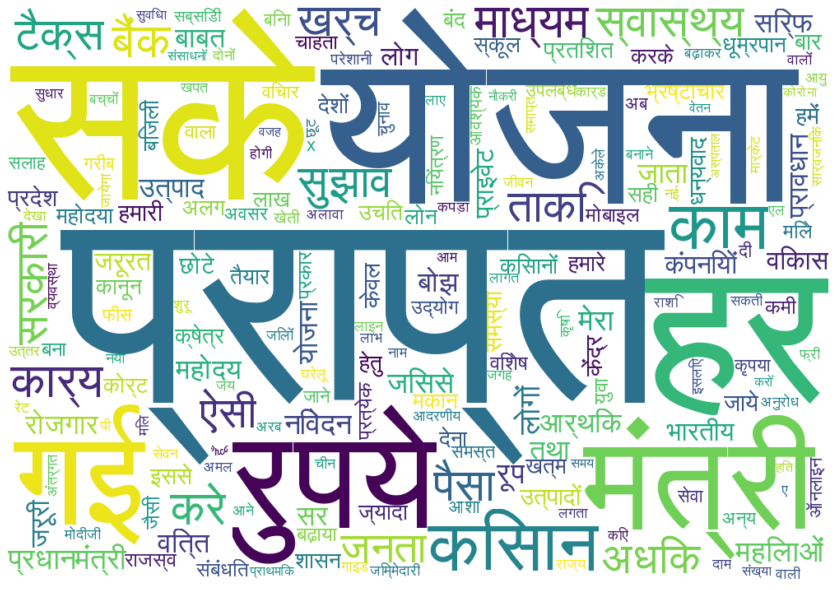

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df_list = []
for i in range(len(df)):
    df_list +=df['tokens_cleaned'][i]
dictionary=Counter(df_list)
font = "/content/drive/MyDrive/Research/Hindi Fonts/Devanagari/gargi.ttf"
dictionary=Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(dictionary)
# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()            

In [ ]:
def _create_frequency_matrix(sentences, tokens):
    frequency_matrix = {}
    #stopWords = set(stopwords.words("english"))
    #ps = PorterStemmer()
# wordfreq = {}
# for sentence in df['title']:
#     tokens = sentence
#     for token in tokens:
#         if token not in wordfreq.keys():
#             wordfreq[token] = 1
#         else:
#             wordfreq[token] += 1

    for sent,token in zip(sentences,tokens):
        freq_table = {}
        words = token
        #print(words, sent)
        for word in words:
            #word = word.lower()
            #word = ps.stem(word)
            #if word in stopWords:
                #continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix
def _create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence

        tf_matrix[sent] = tf_table

    return tf_matrix
def _create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table
def _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix
def _score_sentences(tf_idf_matrix) -> dict:
    """
    score a sentence by its word's TF
    Basic algorithm: adding the TF frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

    return sentenceValue
def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original summary_text
    average = (sumValues / len(sentenceValue))

    return average

def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentenceValue and sentenceValue[sentence[:15]] >= (threshold) and len(sentence)>15:
            summary += sentence + "। "
            sentence_count += 1

    return summary

In [ ]:
sentences = df['title']

In [ ]:
#df['title']

In [ ]:
tokens = df['tokens_cleaned']

In [ ]:
#sentences[0]

In [ ]:
freq_matrix = _create_frequency_matrix(sentences, tokens)
#print(freq_matrix)

'''
Term frequency (TF) is how often a word appears in a document, divided by how many words are there in a document.
'''
# 3 Calculate TermFrequency and generate a matrix
tf_matrix = _create_tf_matrix(freq_matrix)
#print(tf_matrix)

# 4 creating table for documents per words
count_doc_per_words = _create_documents_per_words(freq_matrix)
#print(count_doc_per_words)
total_documents = len(df)
'''
Inverse document frequency (IDF) is how unique or rare a word is.
'''
# 5 Calculate IDF and generate a matrix
idf_matrix = _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
#print(idf_matrix)

# 6 Calculate TF-IDF and generate a matrix
tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)
#print(tf_idf_matrix)

# 7 Important Algorithm: score the sentences
sentence_scores = _score_sentences(tf_idf_matrix)
#print(sentence_scores)

# 8 Find the threshold
threshold = _find_average_score(sentence_scores)
#print(threshold)

# 9 Important Algorithm: Generate the summary
summary = _generate_summary(sentences, sentence_scores, 1.5 * threshold)
print(summary)

गांव की सड़कें बनवाइए  । तंबाकू पर टैक्स बढ़ाया जाए इसका मैं समर्थन करता हूं। हम जहा से चले वही रह गए। मैं सरकार को सहयोग देना चाहता हूँ। मगर मुझे ऐसा लगता है की यह जो कर प्रणाली है उसमे कुछ बदलाव हो सकते है। संचालित कार्य पंजीयन और पर्यवेक्षण। डिजिटल इंडिया और डिजिटल लेंनदेंन को बढ़ावा देने के लिए मोबाइल फोन की कीमतों को कम करना होगा। बहुतबहुत धन्यवाद सर।  रासायनिक खाद कि उपर जो सबसिडी है उसको कम ना करे उपर से उसको बढाये। अधिक रोड का अधिक । सबकी बारबीजेपी सरकार  नई सोच । इंजीनियर छोटी किराना शॉप अपना किराना दुकान देवास म। हिंदुस्तान में जितने भी बैंक अकाउंट है और एक बैंक अकाउंट को जीएसटी नंबर लेना चाहिए। गाव  मे अभी तक शुद्ध पिने का पाणी नही है गाव गाव पिने लायक पाणी की सुविधा करणी चाहिए। गांधी का सिद्धांत जो बना हमारी विरासत।  मोबाइल  फाउंडर देश की सामाजिक सरोकार ब्लॉग । कानून को पूर्ण स्पष्ट परिभाषित होना चाहिए । 


In [ ]:
y = summary.split('। ')
print(len(y))

18


In [ ]:
y

['गांव की सड़कें बनवाइए  ',
 'तंबाकू पर टैक्स बढ़ाया जाए इसका मैं समर्थन करता हूं',
 'हम जहा से चले वही रह गए',
 'मैं सरकार को सहयोग देना चाहता हूँ',
 'मगर मुझे ऐसा लगता है की यह जो कर प्रणाली है उसमे कुछ बदलाव हो सकते है',
 'संचालित कार्य पंजीयन और पर्यवेक्षण',
 'डिजिटल इंडिया और डिजिटल लेंनदेंन को बढ़ावा देने के लिए मोबाइल फोन की कीमतों को कम करना होगा',
 'बहुतबहुत धन्यवाद सर',
 ' रासायनिक खाद कि उपर जो सबसिडी है उसको कम ना करे उपर से उसको बढाये',
 'अधिक रोड का अधिक ',
 'सबकी बारबीजेपी सरकार  नई सोच ',
 'इंजीनियर छोटी किराना शॉप अपना किराना दुकान देवास म',
 'हिंदुस्तान में जितने भी बैंक अकाउंट है और एक बैंक अकाउंट को जीएसटी नंबर लेना चाहिए',
 'गाव  मे अभी तक शुद्ध पिने का पाणी नही है गाव गाव पिने लायक पाणी की सुविधा करणी चाहिए',
 'गांधी का सिद्धांत जो बना हमारी विरासत',
 ' मोबाइल  फाउंडर देश की सामाजिक सरोकार ब्लॉग ',
 'कानून को पूर्ण स्पष्ट परिभाषित होना चाहिए ',
 '']